# Feature Engineering

#### It has 4 steps
#### 1. Feature Transformation -> Missing Values Inputation, Handling Categorical Features, Outlier Detection, Feature Scaling. 
#### 2. Feature Construction
#### 3. Feature Selection
#### 4. Feature Extraction

### Feature Scaling
#### --> It's a technique to standardize the independent features present in the data in a fixed range. 
#### Normalization (Min-Max Scaling)

It shrinks numbers to fit between 0 and 1.
Like converting heights from centimeters to a scale of 0 to 1 so no one's height is too large or too small.

Used When:
Data does not follow a normal distribution.
Algorithms that rely on distance (e.g., KNN, K-Means, SVM) work better with normalized data.

#### Standardization (Z-Score Scaling)

It makes the data follow a normal distribution with a mean of 0 and a standard deviation of 1.
Like adjusting test scores so that everyone’s performance is measured fairly.

Used When:
Data follows a normal distribution.
Used in logistic regression, linear regression, PCA, and neural networks.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (353, 10), Testing Data: (89, 10)


In [4]:
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled_df.head())

        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.816667  1.0  0.405172  0.690141  0.544503  0.524900  0.220779  0.423131   
1  0.450000  1.0  0.284483  0.323944  0.335079  0.406375  0.103896  0.564175   
2  0.516667  0.0  0.556034  0.859155  0.356021  0.315737  0.337662  0.282087   
3  0.366667  0.0  0.215517  0.338028  0.198953  0.181275  0.467532  0.141044   
4  0.383333  0.0  0.094828  0.126761  0.267016  0.197211  0.571429  0.000000   

         s5        s6  
0  0.590930  0.500000  
1  0.486609  0.575758  
2  0.551160  0.454545  
3  0.293517  0.030303  
4  0.342588  0.348485  


In [5]:
scaler_standard = StandardScaler()  
X_train_std = scaler_standard.fit_transform(X_train)  
X_test_std = scaler_standard.transform(X_test)

X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns)
print(X_train_std_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  1.498365  1.061370  0.219902  1.138874  0.728473  1.055893 -0.824451   
1 -0.228858  1.061370 -0.419366 -0.710591 -0.424929  0.272425 -1.529791   
2  0.085182 -0.942179  1.018987  1.992473 -0.309589 -0.326699 -0.119111   
3 -0.621409 -0.942179 -0.784662 -0.639458 -1.174640 -1.215508  0.664600   
4 -0.542899 -0.942179 -1.423930 -1.706457 -0.799784 -1.110167  1.291569   

         s4        s5        s6  
0  0.711038  0.547482 -0.061449  
1  1.484286 -0.019757  0.367236  
2 -0.062210  0.331237 -0.318660  
3 -0.835458 -1.069682 -2.719299  
4 -1.608706 -0.802859 -0.918820  


In [6]:
print("Original Data (First 5 Rows):")
print(X_train.head())

print("\nMin-Max Normalized Data (First 5 Rows):")
print(X_train_scaled_df.head())

print("\nStandardized Data (First 5 Rows):")
print(X_train_std_df.head())

Original Data (First 5 Rows):
          age       sex       bmi        bp        s1        s2        s3  \
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
66  -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
137  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
245 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   

           s4        s5        s6  
17   0.034309  0.027364 -0.001078  
66   0.071210  0.000272  0.019633  
137 -0.002592  0.017036 -0.013504  
245 -0.039493 -0.049872 -0.129483  
31  -0.076395 -0.037129 -0.042499  

Min-Max Normalized Data (First 5 Rows):
        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.816667  1.0  0.405172  0.690141  0.544503  0.524900  0.220779  0.423131   
1  0.450000  1.0  0.284483  0.323944  0.335079  0.406375  0.103896  0.564175   
2  0.51666

Text(0.5, 1.0, 'Original BMI Distribution')

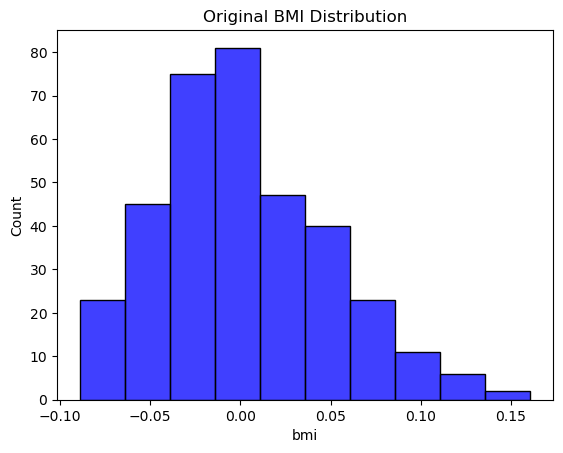

In [7]:
sns.histplot(X_train['bmi'], bins = 10, color='blue')
plt.title("Original BMI Distribution")

Text(0.5, 1.0, 'Scaled BMI Distribution')

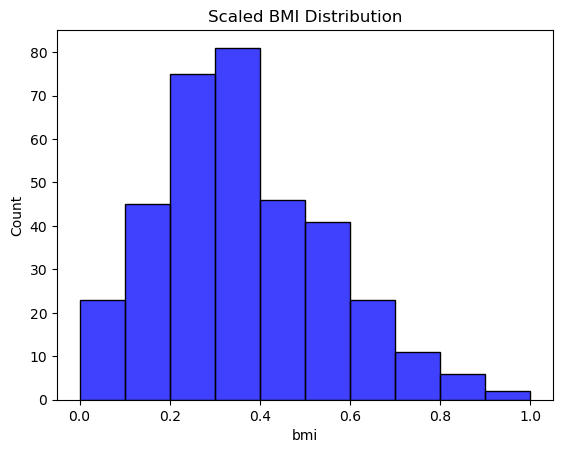

In [8]:
sns.histplot(X_train_scaled_df['bmi'], bins = 10, color='blue')
plt.title("Scaled BMI Distribution")

In [9]:
#do feature scaling on healthexp dataset
healthexp = sns.load_dataset("healthexp")
healthexp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [10]:
# using get dummies function of pandas library to encode COuntry column since it is a nominal categorical data
healthexp = pd.get_dummies(healthexp, columns=['Country'])

#pop and append value at the end of column
# X = healthexp.drop(columns=['Life_Expectancy'])
healthexp["Life_Expectancy"] = healthexp.pop("Life_Expectancy")
healthexp

# Training and Testing data set split
X_train, X_test, y_train, y_test = train_test_split(healthexp.iloc[:, :-1], healthexp['Life_Expectancy'], test_size=0.2)

In [11]:
X_train

,Year,Spending_USD,Country_Canada,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
99,1991,2901.589,False,False,False,False,False,True
81,1988,688.049,False,False,False,True,False,False
198,2008,3729.353,False,True,False,False,False,False
146,1999,1667.922,False,False,False,False,True,False
21,1975,284.269,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
180,2005,3264.574,False,True,False,False,False,False
90,1990,1724.332,False,False,True,False,False,False
104,1992,1253.415,False,False,False,False,True,False
64,1985,1298.555,False,False,True,False,False,False


In [12]:
y_train

99     75.5
81     75.3
198    81.4
146    80.5
21     74.3
       ... 
180    80.4
90     77.3
104    79.2
64     75.0
130    78.3
Name: Life_Expectancy, Length: 219, dtype: float64

In [21]:
# Using min max for getting data in range between 0 to 1 for life expectancy
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled_df = pd.DataFrame(X_test, columns=X_test.columns)
X_test_scaled_df["Life_Expectancy"] = y_test.values
print("Train Scaled(Min Max): \n",X_train_scaled_df.head())
print("Test Scaled(Min Max): \n",X_test_scaled_df.head())

Train Scaled(Min Max): 
    Year  Spending_USD  Country_Canada  Country_France  Country_Germany  \
0  0.42      0.236690             0.0             0.0              0.0   
1  0.36      0.048065             0.0             0.0              0.0   
2  0.76      0.307226             0.0             1.0              0.0   
3  0.58      0.131564             0.0             0.0              0.0   
4  0.10      0.013658             0.0             0.0              0.0   

   Country_Great Britain  Country_Japan  Country_USA  
0                    0.0            0.0          1.0  
1                    1.0            0.0          0.0  
2                    0.0            0.0          0.0  
3                    0.0            1.0          0.0  
4                    0.0            1.0          0.0  
Test Scaled(Min Max): 
      Year  Spending_USD  Country_Canada  Country_France  Country_Germany  \
116  1994      1420.271           False           False            False   
260  2018      4554.276 

Text(0.5, 1.0, 'Spending USD Over Years (USA vs Others)')

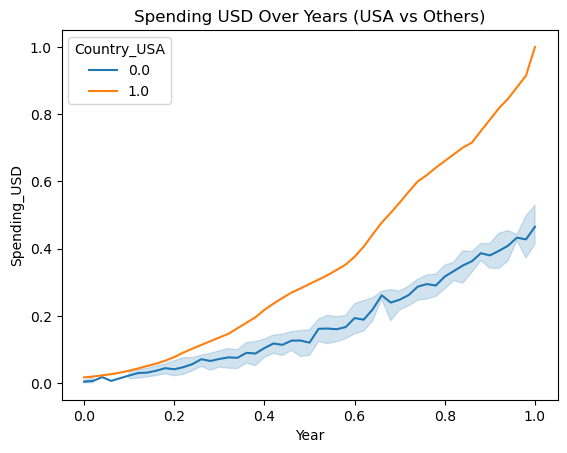

In [18]:
sns.lineplot(data=X_train_scaled_df, x="Year", y="Spending_USD", hue="Country_USA", markers=True)
plt.title("Spending USD Over Years (USA vs Others)")

Text(0.5, 1.0, 'Life Expectancy Over Years (USA vs Others)')

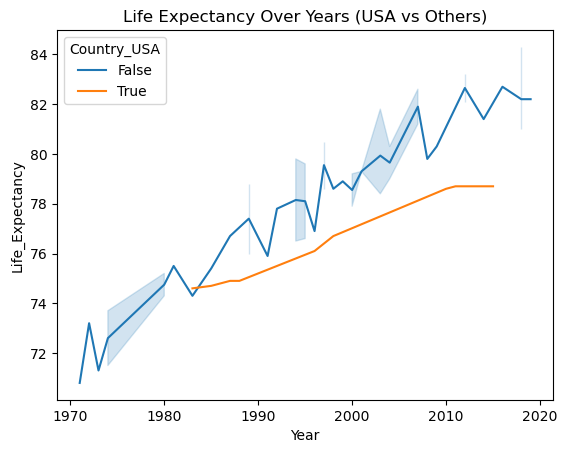

In [26]:
sns.lineplot(data=X_test_scaled_df, x="Year", y="Life_Expectancy", hue="Country_USA")
plt.title("Life Expectancy Over Years (USA vs Others)")